In [245]:
# !pip install plotly tensorflow

In [1]:
import pandas as pd 
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.dates as mdates
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, Dropout, SimpleRNN
import tensorflow as tf
import math

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098851,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103662,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.108036,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113722,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.124219,55574400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10272 non-null  object 
 1   Open       10272 non-null  float64
 2   High       10272 non-null  float64
 3   Low        10272 non-null  float64
 4   Close      10272 non-null  float64
 5   Adj Close  10272 non-null  float64
 6   Volume     10272 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 561.9+ KB


In [20]:
df.isnull().sum().any()

False

In [21]:
df.describe()

,High,Low,Close
count,10272.000000,10272.000000,10272.000000
mean,12.134860,11.877629,12.011191
std,25.388548,24.833693,25.123982
min,0.049665,0.049107,0.049107
25%,0.284375,0.270089,0.276964
50%,0.464286,0.446987,0.455357
75%,12.825715,12.579017,12.687143
max,157.259995,154.389999,156.690002


In [22]:
df.shape

(10272, 3)

In [23]:
df.dtypes

High     float64
Low      float64
Close    float64
dtype: object

In [24]:
df["Date"]=pd.to_datetime(df.Date, dayfirst=True)
df.set_index("Date",inplace=True)
df

AttributeError: 'DataFrame' object has no attribute 'Date'

In [ ]:
# Data Correlation: Relationship between columns
df.corr()

In [ ]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In [ ]:
plt.figure(figsize=(16,10))

plt.title('Closing price history')
plt.plot(df['Close'],label='prices', color='purple')
# plt.plot(df_dp['Date'],df_dp['Close'],label='Max Temp.')
plt.legend()
####### Use the below functions #######
dtFmt = mdates.DateFormatter('%Y-%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.show()

In [ ]:
df.columns

In [ ]:
# dft = df.copy()
col_to_keep = ['Close', 'High', 'Low', ]

for col in df.columns:
    if col not in col_to_keep:
        del df[col]

In [ ]:
df.plot.line(subplots=True, title='Stock Prices')
df.plot.line(title='Stock Prices')

In [25]:
data = df.filter(['Close'])
dataset = data.values

In [26]:
dataset

array([[1.28348000e-01],
       [1.21652000e-01],
       [1.12723000e-01],
       ...,
       [1.54300003e+02],
       [1.56690002e+02],
       [1.55110001e+02]])

In [27]:
# train_app_len = int(dfa.shape[0]*0.75)
train_len = math.ceil(len(df)*.75)
train_len

7704

In [28]:
ms = MinMaxScaler(feature_range=(0,1))
scaled_df = ms.fit_transform(dataset)

In [29]:
# creating the training dataset
train_df = scaled_df[0:train_len, :]
X_train, y_train= [], []

for x in range(60, len(train_df)):
    X_train.append(train_df[x-60:x, 0])
    y_train.append(train_df[x, 0])

In [30]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [32]:
X_train.shape

(7644, 60, 1)

In [33]:
def plot_scaled(dfd, title):
    plt.plot(dfd)
    plt.ylabel("Price")
    plt.xlabel("Time(Days)")
    plt.title(f"{title} Stock Data")
    plt.show()

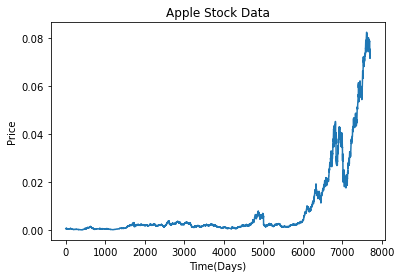

In [34]:
plot_scaled(train_df, title="Apple")

# Model Definition

In [35]:
def RNNMODEL(X_train=[], Y_train=[]):
    # Initialising the RNN
    regressor = Sequential()

    # Add the first RNN layer and some Dropout regularisation
    regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    # Second RNN layer and some Dropout regularisation
    regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
    regressor.add(Dropout(0.2))

    # Third RNN layer and some Dropout regularisation
    regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
    regressor.add(Dropout(0.2))

    # Fourth RNN layer and some Dropout regularisation
    regressor.add(SimpleRNN(units = 50))
    regressor.add(Dropout(0.2))

    # Add the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = "adam", loss = "mean_squared_error")
    regressor.summary()

    # Fitting the RNN to the training set
    regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)
    
    return regressor

In [303]:
def LSTMMODEL(X_train=[], Y_train=[]): 
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1),  activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(50,  return_sequences=False,  activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(25,  activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    model.summary()
#     model.fit(X_tr, X_tr, epochs=1, batch_size=1)
    
    model.fit(X_train, Y_train, epochs=100, batch_size=32)
    return model

# RNN ANALYSIS

In [36]:
rnn_model = RNNMODEL(X_train = X_train , Y_train=y_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5

239/239 [==============================] - 17s 72ms/step - loss: 5.9689e-06
Epoch 76/100
239/239 [==============================] - 18s 76ms/step - loss: 5.2615e-06
Epoch 77/100
239/239 [==============================] - 17s 72ms/step - loss: 6.1724e-06
Epoch 78/100
239/239 [==============================] - 17s 72ms/step - loss: 5.9078e-06
Epoch 79/100
239/239 [==============================] - 18s 73ms/step - loss: 7.8096e-06
Epoch 80/100
239/239 [==============================] - 14s 58ms/step - loss: 4.9694e-06
Epoch 81/100
239/239 [==============================] - 12s 52ms/step - loss: 4.2953e-06
Epoch 82/100
239/239 [==============================] - 13s 53ms/step - loss: 5.1632e-06
Epoch 83/100
239/239 [==============================] - 13s 53ms/step - loss: 5.8437e-06
Epoch 84/100
239/239 [==============================] - 17s 70ms/step - loss: 5.5865e-06
Epoch 85/100
239/239 [==============================] - 16s 67ms/step - loss: 5.2576e-06
Epoch 86/100
239/239 [============

In [37]:
test_df = scaled_df[train_len-60: , :]
y_test = dataset[train_len:, :]
X_test = []

for x in range(60, len(test_df)):
    X_test.append(test_df[x-60:x, 0])  

In [38]:
X_test = np.array(X_test)

In [39]:
X_test.shape 

(2568, 60)

In [40]:
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [41]:
X_test.shape 

(2568, 60, 1)

In [42]:
pred = rnn_model.predict(X_test)
pred_stock = ms.inverse_transform(pred)

81/81 [==============================] - 2s 17ms/step


In [43]:
# evaluating the performance of the model
print("RNN GOOGLE R2-Score of LSTM predictions for {0}".format(r2_score(y_test, pred_stock)))
print('RNN GOOGLE Mean Absolute Error:', mean_absolute_error(y_test, pred_stock))
print('RNN GOOGLE Mean Squared Error:', mean_squared_error(y_test, pred_stock))
print('RNN GOOGLE Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred_stock)))

RNN GOOGLE R2-Score of LSTM predictions for 0.039847432056402954
RNN GOOGLE Mean Absolute Error: 17.488331361657828
RNN GOOGLE Mean Squared Error: 1102.2626613627515
RNN GOOGLE Mean Root Squared Error: 33.200341283829474


In [297]:
trains = data[:train_len]
valid = data[train_len:]
valid['predictions']=pred_stock

def plot_prediction(trainx, validx, title, subtitle, predictions):
    plt.figure(figsize=(16,8))
    plt.title(f'{title} Prediction With {subtitle}')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(f'{title} Stock price in ($)', fontsize=18)
    plt.plot(trainx['Close'], label=f'{title} Predicted Price', linewidth=1.5)
    plt.plot(validx[['Close', 'predictions']], label='Real Apple Price', linewidth=1.5)
    plt.legend(['Train','Valid', 'Prediciton'], loc='lower right')
    plt.show()

C:\Users\WRASH-~1\AppData\Local\Temp/ipykernel_14884/358488486.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



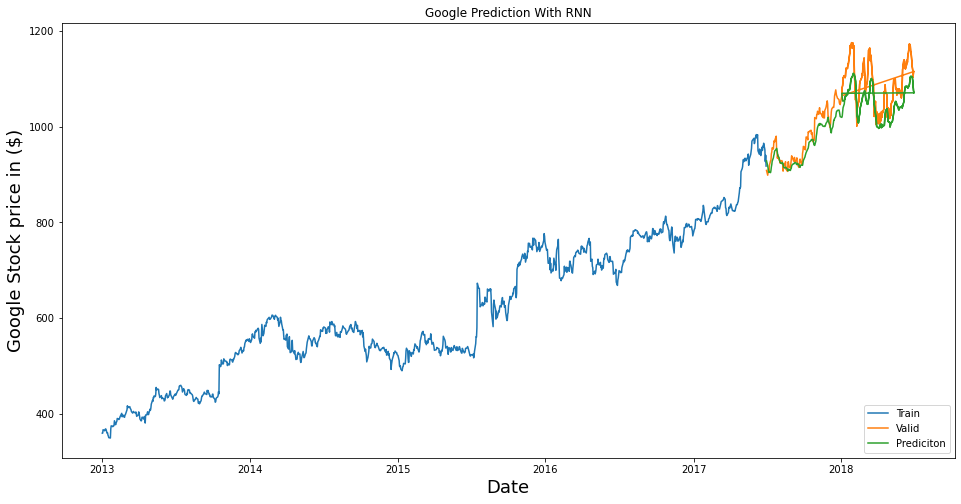

In [298]:
plot_prediction(trainx=trains, validx=valid, title="Google", subtitle="RNN", predictions=pred_stock)

# LSTM ANALYSIS

In [304]:
lstm_model = LSTMMODEL(X_train = X_train , Y_train=y_train)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_28 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_29 (Dropout)        (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 25)                1275      
                                                                 
 dropout_30 (Dropout)        (None, 25)                0         
                                                                 
 dense_18 (Dense)            (None, 1)               

In [ ]:
pred = lstm_model.predict(X_test)
pred_stock = ms.inverse_transform(pred)

In [ ]:
# Evaluating Model's Performance
print("LSTM GOOGLE R2-Score of LSTM predictions for {0}".format(r2_score(y_test, pred_stock)))
print('LSTM GOOGLE Mean Absolute Error:', mean_absolute_error(y_test, pred_stock))
print('LSTM GOOGLE Mean Squared Error:', mean_squared_error(y_test, pred_stock))
print('LSTM GOOGLE Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred_stock)))

In [ ]:
trains = data[:train_len]
valid = data[train_len:]
valid['predictions']=pred_stock

In [ ]:
plot_prediction(trainx=trains, validx=valid, title="Google", subtitle="LSTM", predictions=pred_stock)